In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

In [3]:
train_data_path = './data/train'
test_data_path = './data/test'

train_files = os.listdir(train_data_path)
train_files[0]

'patient_10870.psv'

In [4]:
_df = pd.read_csv(os.path.join(train_data_path, train_files[0]), sep='|')
_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,1,0
1,92.0,NaN,36.6,147.0,109.0,97.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,2,0
2,91.0,97.0,NaN,139.0,94.0,82.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,3,0
3,96.0,NaN,NaN,129.0,99.0,94.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,4,0
4,94.0,NaN,36.8,144.0,101.0,88.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,5,0
5,96.0,NaN,NaN,136.0,100.0,87.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,6,0
6,100.0,NaN,NaN,142.0,102.0,91.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,7,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,8,0
8,96.0,95.0,37.0,137.0,103.0,94.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,9,0
9,93.0,97.0,NaN,129.0,67.0,47.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,56,1,NaN,NaN,-309.11,10,0


In [13]:
_df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,20.000000,15.000000,6.000000,20.000000,20.000000,20.000000,20.000000,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,23.0,0.0,0.0,2.300000e+01,23.00000,23.0
mean,93.150000,96.500000,36.633333,134.175000,99.100000,88.200000,18.675000,NaN,NaN,NaN,...,9.9,NaN,318.0,56.0,1.0,NaN,NaN,-3.091100e+02,12.00000,0.0
std,5.050013,2.771024,0.258199,7.499605,11.396675,13.551461,1.879775,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.162419e-13,6.78233,0.0
min,83.000000,88.500000,36.300000,120.000000,67.000000,47.000000,13.000000,NaN,NaN,NaN,...,9.9,NaN,318.0,56.0,1.0,NaN,NaN,-3.091100e+02,1.00000,0.0
25%,90.750000,95.500000,36.450000,129.000000,95.500000,85.750000,18.000000,NaN,NaN,NaN,...,9.9,NaN,318.0,56.0,1.0,NaN,NaN,-3.091100e+02,6.50000,0.0
50%,93.000000,97.000000,36.650000,131.500000,100.500000,89.500000,19.000000,NaN,NaN,NaN,...,9.9,NaN,318.0,56.0,1.0,NaN,NaN,-3.091100e+02,12.00000,0.0
75%,95.250000,98.000000,36.775000,139.750000,105.500000,94.750000,20.000000,NaN,NaN,NaN,...,9.9,NaN,318.0,56.0,1.0,NaN,NaN,-3.091100e+02,17.50000,0.0
max,108.000000,100.000000,37.000000,147.000000,119.000000,109.000000,21.000000,NaN,NaN,NaN,...,9.9,NaN,318.0,56.0,1.0,NaN,NaN,-3.091100e+02,23.00000,0.0


In [7]:
(_df['SepsisLabel'] == 1).any()

False

In [3]:
with open(os.path.join(train_data_path, train_files[0]), 'r') as f:
    print(f.readline())

HR|O2Sat|Temp|SBP|MAP|DBP|Resp|EtCO2|BaseExcess|HCO3|FiO2|pH|PaCO2|SaO2|AST|BUN|Alkalinephos|Calcium|Chloride|Creatinine|Bilirubin_direct|Glucose|Lactate|Magnesium|Phosphate|Potassium|Bilirubin_total|TroponinI|Hct|Hgb|PTT|WBC|Fibrinogen|Platelets|Age|Gender|Unit1|Unit2|HospAdmTime|ICULOS|SepsisLabel



In [9]:
sepsis = []
non_sepsis = []
with tqdm(total=len(train_files)) as pbar:
    for f in train_files:
        df = pd.read_csv(os.path.join(train_data_path, f), sep='|')
        if (df['SepsisLabel'] == 1).any():
            sepsis.append(df)
        else:
            non_sepsis.append(df)
        pbar.update(1)
print(f'Found {len(sepsis)} sepsis and {len(non_sepsis)} non-sepsis')

100%|██████████| 20000/20000 [01:20<00:00, 249.35it/s]

Found 1415 sepsis and 18585 non-sepsis


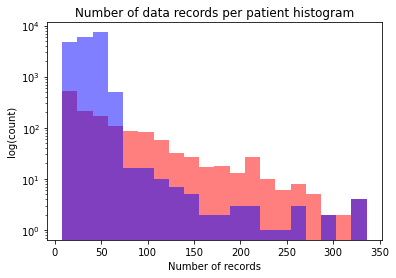

In [134]:
sepsis_patient_num_rows = [df.shape[0] for df in sepsis]
non_sepsis_patient_num_rows = [df.shape[0] for df in non_sepsis]

plt.plot()
plt.title('Number of data records per patient histogram')
plt.hist(sepsis_patient_num_rows, color='r', alpha=0.5, label='Sepsis', bins=20, log=True)
plt.hist(non_sepsis_patient_num_rows, color='b', alpha=0.5, label='Non-sepsis', bins=20, log=True)
plt.xlabel('Number of records')
plt.ylabel('log(count)')
plt.show()

In [57]:
sepsis_missing_values = sum([df.isna().sum() for df in sepsis])
sepsis_total_values = sum([df.shape[0] for df in sepsis])

print('Sepsis null values rates:')
print(sepsis_missing_values / sepsis_total_values)

Sepsis null values rates:
HR                  0.072529
O2Sat               0.093424
Temp                0.642466
SBP                 0.148028
MAP                 0.089112
DBP                 0.259678
Resp                0.129295
EtCO2               0.898834
BaseExcess          0.909379
HCO3                0.943209
FiO2                0.830171
pH                  0.887300
PaCO2               0.906903
SaO2                0.951640
AST                 0.978646
BUN                 0.919476
Alkalinephos        0.978743
Calcium             0.926227
Chloride            0.936301
Creatinine          0.932532
Bilirubin_direct    0.997391
Glucose             0.820786
Lactate             0.946555
Magnesium           0.921010
Phosphate           0.947014
Potassium           0.883616
Bilirubin_total     0.981545
TroponinI           0.992874
Hct                 0.901685
Hgb                 0.916311
PTT                 0.961882
WBC                 0.926723
Fibrinogen          0.990627
Platelets        

In [58]:
non_sepsis_missing_values = sum([df.isna().sum() for df in non_sepsis])
non_sepsis_total_values = sum([df.shape[0] for df in non_sepsis])

print('Non-Sepsis null values rates:')
print(non_sepsis_missing_values / non_sepsis_total_values)

Non-Sepsis null values rates:
HR                  0.102276
O2Sat               0.135168
Temp                0.662988
SBP                 0.147022
MAP                 0.129264
DBP                 0.318214
Resp                0.157342
EtCO2               0.972131
BaseExcess          0.949461
HCO3                0.960375
FiO2                0.927296
pH                  0.935063
PaCO2               0.948403
SaO2                0.966615
AST                 0.984689
BUN                 0.932947
Alkalinephos        0.984866
Calcium             0.943269
Chloride            0.957159
Creatinine          0.940041
Bilirubin_direct    0.998193
Glucose             0.829152
Lactate             0.976437
Magnesium           0.939062
Phosphate           0.961888
Potassium           0.909382
Bilirubin_total     0.985742
TroponinI           0.990007
Hct                 0.912310
Hgb                 0.927200
PTT                 0.972021
WBC                 0.937154
Fibrinogen          0.993936
Platelets    

In [98]:
avg_missing_rate = dict(0.5*((non_sepsis_missing_values / non_sepsis_total_values) + (sepsis_missing_values / sepsis_total_values)))

low_missing_features = []
high_missing_features = []

threshold = 0.3

for feature, rate in avg_missing_rate.items():
    if rate <= threshold:
        low_missing_features.append(feature)
    else:
        high_missing_features.append(feature)

print('Low missing rate:', ','.join(low_missing_features))
print('High missing rate:', ','.join(high_missing_features))

Low missing rate: HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
High missing rate: Temp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Unit1,Unit2


In [103]:
df = sepsis[0][low_missing_features]
corr = df.corr()
corr

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
HR,1.000000,-0.376104,0.258617,0.222599,0.191839,0.345150,NaN,NaN,NaN,-0.324900,0.220692
O2Sat,-0.376104,1.000000,-0.069117,-0.128142,-0.110560,-0.371355,NaN,NaN,NaN,0.185577,0.173673
SBP,0.258617,-0.069117,1.000000,0.687292,0.523808,0.395709,NaN,NaN,NaN,0.267282,0.027308
MAP,0.222599,-0.128142,0.687292,1.000000,0.862007,0.284807,NaN,NaN,NaN,0.136703,-0.029770
DBP,0.191839,-0.110560,0.523808,0.862007,1.000000,0.374362,NaN,NaN,NaN,0.172463,0.015832
Resp,0.345150,-0.371355,0.395709,0.284807,0.374362,1.000000,NaN,NaN,NaN,0.064637,-0.001153
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HospAdmTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICULOS,-0.324900,0.185577,0.267282,0.136703,0.172463,0.064637,NaN,NaN,NaN,1.000000,0.484264


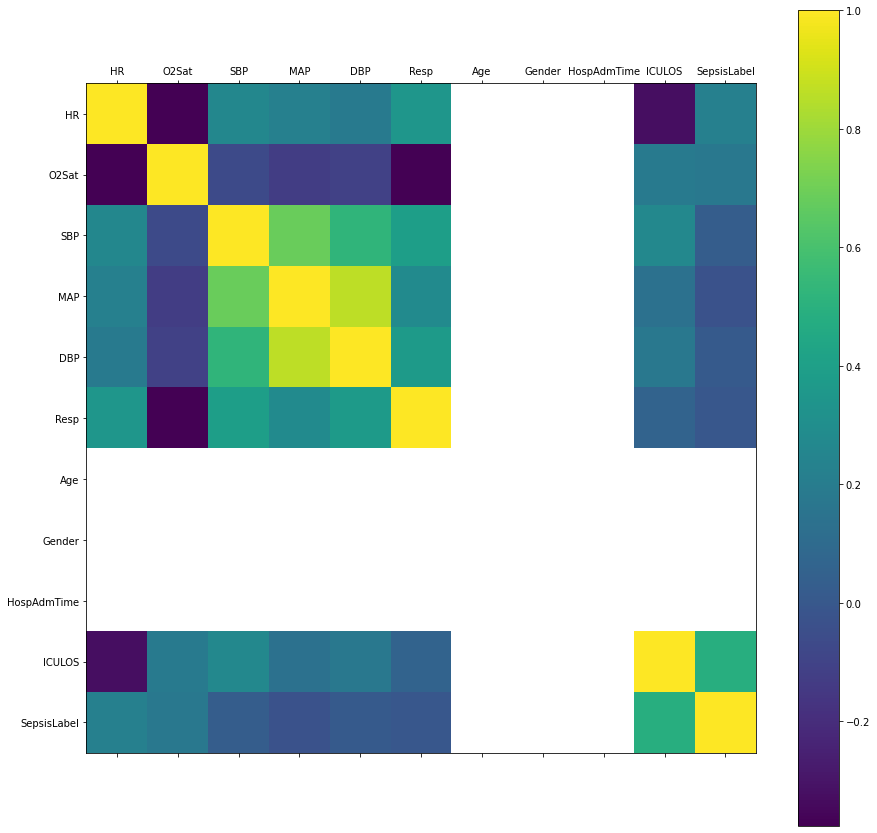

In [133]:
plt.figure(figsize=(15,15))
ax = plt.axes()
mat = ax.matshow(df.corr())
plt.colorbar(mat)
ax.set_xticks(range(len(df.columns)), df.columns)
ax.set_yticks(range(len(df.columns)), df.columns)
plt.show()

In [73]:
sepsis_missing_completely = sum([df.isna().all() for df in sepsis])
sepsis_missing_completely

HR                     0
O2Sat                  1
Temp                  16
SBP                   55
MAP                    0
DBP                  229
Resp                   9
EtCO2               1162
BaseExcess           652
HCO3                 574
FiO2                 361
pH                   328
PaCO2                339
SaO2                 688
AST                  655
BUN                   93
Alkalinephos         667
Calcium              129
Chloride             496
Creatinine            95
Bilirubin_direct    1274
Glucose               56
Lactate              523
Magnesium            147
Phosphate            275
Potassium             63
Bilirubin_total      661
TroponinI           1163
Hct                   98
Hgb                  106
PTT                  493
WBC                  116
Fibrinogen          1146
Platelets            113
Age                    0
Gender                 0
Unit1                638
Unit2                638
HospAdmTime            0
ICULOS                 0


In [74]:
non_sepsis_missing_completely = sum([df.isna().all() for df in non_sepsis])
non_sepsis_missing_completely

HR                      3
O2Sat                  11
Temp                  115
SBP                    81
MAP                    44
DBP                  3341
Resp                   27
EtCO2               17271
BaseExcess          12774
HCO3                 9500
FiO2                10807
pH                  10255
PaCO2               10532
SaO2                12794
AST                 12276
BUN                   908
Alkalinephos        12367
Calcium              2551
Chloride             8961
Creatinine            924
Bilirubin_direct    17727
Glucose               711
Lactate             13277
Magnesium            2322
Phosphate            5760
Potassium             852
Bilirubin_total     12299
TroponinI           15282
Hct                  1057
Hgb                  1116
PTT                  9577
WBC                  1190
Fibrinogen          16623
Platelets            1174
Age                     0
Gender                  0
Unit1                7048
Unit2                7048
HospAdmTime 

we will ignore DBP and SBP since MAP can be used as a blood pressure measure and calculated based on SBP and DBP

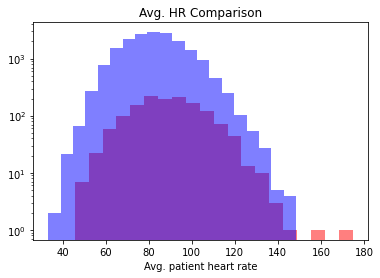

In [38]:
sepsis_mean_hr = [df.HR.mean() for df in sepsis]
non_sepsis_mean_hr = [df.HR.mean() for df in non_sepsis]

plt.plot()
plt.title('Avg. HR Comparison')
plt.hist(sepsis_mean_hr, color='r', alpha=0.5, label='Sepsis', bins=20, log=True)
plt.hist(non_sepsis_mean_hr, color='b', alpha=0.5, label='Non-sepsis', bins=20, log=True)
plt.xlabel('Avg. patient heart rate')
plt.show()

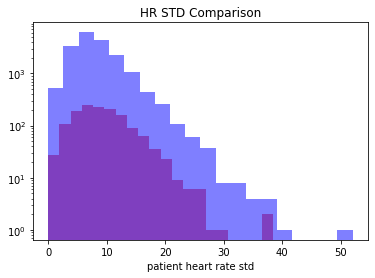

In [39]:
sepsis_std_hr = [df.HR.std() for df in sepsis]
non_sepsis_std_hr = [df.HR.std() for df in non_sepsis]

plt.plot()
plt.title('HR STD Comparison')
plt.hist(sepsis_std_hr, color='r', alpha=0.5, label='Sepsis', bins=20, log=True)
plt.hist(non_sepsis_std_hr, color='b', alpha=0.5, label='Non-sepsis', bins=20, log=True)
plt.xlabel('patient heart rate std')
plt.show()

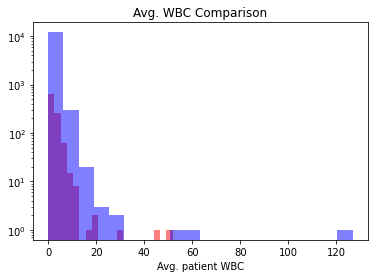

In [43]:
sepsis_std_WBC = [df.WBC.std() for df in sepsis]
non_sepsis_std_WBC = [df.WBC.std() for df in non_sepsis]

plt.plot()
plt.title('Avg. WBC Comparison')
plt.hist(sepsis_std_WBC, color='r', alpha=0.5, label='Sepsis', bins=20, log=True)
plt.hist(non_sepsis_std_WBC, color='b', alpha=0.5, label='Non-sepsis', bins=20, log=True)
plt.xlabel('Avg. patient WBC')
plt.show()

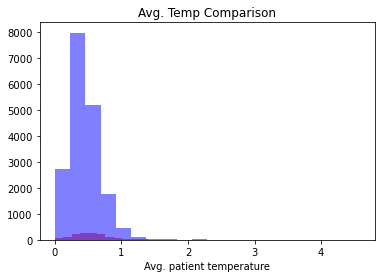

In [31]:
sepsis_std_temp = [df.Temp.std() for df in sepsis]
non_sepsis_std_temp = [df.Temp.std() for df in non_sepsis]

plt.plot()
plt.title('Avg. Temp Comparison')
plt.hist(sepsis_std_temp, color='r', alpha=0.5, label='Sepsis', bins=20)
plt.hist(non_sepsis_std_temp, color='b', alpha=0.5, label='Non-sepsis', bins=20)
plt.xlabel('Avg. patient temperature')
plt.show()

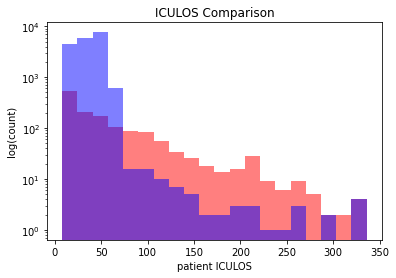

In [37]:
sepsis_max_iculos = [df.ICULOS.max() for df in sepsis]
non_sepsis_max_iculos = [df.ICULOS.max() for df in non_sepsis]

plt.plot()
plt.title('ICULOS Comparison')
plt.hist(sepsis_max_iculos, color='r', alpha=0.5, label='Sepsis', bins=20, log=True)
plt.hist(non_sepsis_max_iculos, color='b', alpha=0.5, label='Non-sepsis', bins=20, log=True)
plt.xlabel('patient ICULOS')
plt.ylabel('log(count)')
plt.show()

We can observe that higher length of stay is more dominant with sepsis patients

In [6]:
data[0].std()

HR                  3.937591e+00
O2Sat               1.081216e+00
Temp                5.996030e-01
SBP                 1.194143e+01
MAP                 1.009041e+01
DBP                 1.440631e+01
Resp                4.031413e+00
EtCO2                        NaN
BaseExcess                   NaN
HCO3                         NaN
FiO2                3.535534e-02
pH                  4.949747e-02
PaCO2               8.485281e+00
SaO2                9.192388e-01
AST                          NaN
BUN                 4.242641e+00
Alkalinephos                 NaN
Calcium             0.000000e+00
Chloride                     NaN
Creatinine          1.131371e-01
Bilirubin_direct             NaN
Glucose             2.854412e+01
Lactate                      NaN
Magnesium                    NaN
Phosphate           6.363961e-01
Potassium           0.000000e+00
Bilirubin_total              NaN
TroponinI                    NaN
Hct                 2.333452e+00
Hgb                 2.121320e-01
PTT       

In [29]:
sepsis = []
for i, df in enumerate(data):
    if (df['SepsisLabel'] == 1).any():
        sepsis.append(i)
        first_sepsis_idx = df['SepsisLabel'].idxmax()
        data[i] = df[:first_sepsis_idx+1]

In [33]:
data[sepsis[3]]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,1,0
1,88.0,100.0,NaN,83.0,52.0,42.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,2,0
2,98.0,100.0,NaN,110.0,75.0,58.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,3,0
3,94.0,100.0,37.39,112.0,76.0,58.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,4,0
4,97.0,100.0,NaN,125.0,88.0,69.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,108.0,94.0,NaN,126.0,69.0,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,70,0
70,102.0,94.0,NaN,117.0,62.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,71,0
71,96.0,98.0,37.50,123.0,66.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,72,0
72,98.0,NaN,NaN,124.5,67.0,NaN,11.5,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,73,0


In [9]:
if (sepsis['SepsisLabel'] == 1).anysepsis['SepsisLabel'].idxmax()

2

In [12]:
t = torch.from_numpy(data[0].to_numpy())
t.shape
len(t)

52

In [7]:
data[0].isna().any().any()

True

In [5]:
i = 0
for df in data:
    i += df.SepsisLabel.max()
i, len(data), 1-i/len(data)

(11, 200, 0.945)

In [6]:
X = pd.concat(data)
X

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,1,0
1,58.5,96.0,NaN,133.0,54.0,30.0,28.5,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,2,0
2,54.0,97.0,36.40,128.0,58.0,36.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,3,0
3,58.0,97.0,NaN,116.0,50.0,28.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,4,0
4,58.0,98.0,NaN,128.0,65.0,49.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,89.0,94.0,NaN,121.0,75.0,56.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.53,1,NaN,NaN,-0.03,36,0
36,93.0,92.0,NaN,124.0,71.0,47.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.53,1,NaN,NaN,-0.03,37,0
37,102.0,88.0,NaN,109.0,67.0,48.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.53,1,NaN,NaN,-0.03,38,0
38,94.0,93.0,36.94,127.0,74.0,50.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.53,1,NaN,NaN,-0.03,39,0


In [7]:
missing = np.sum(X.isna(), axis=0) / len(X)
missing

HR                  0.107731
O2Sat               0.145124
Temp                0.671877
SBP                 0.150896
MAP                 0.130215
DBP                 0.296621
Resp                0.152339
EtCO2               0.967777
BaseExcess          0.958158
HCO3                0.965613
FiO2                0.925574
pH                  0.941085
PaCO2               0.953709
SaO2                0.966334
AST                 0.985211
BUN                 0.934472
Alkalinephos        0.984850
Calcium             0.940964
Chloride            0.962246
Creatinine          0.941926
Bilirubin_direct    0.999279
Glucose             0.820488
Lactate             0.975231
Magnesium           0.940483
Phosphate           0.966574
Potassium           0.907539
Bilirubin_total     0.986053
TroponinI           0.987856
Hct                 0.918721
Hgb                 0.932067
PTT                 0.977877
WBC                 0.940724
Fibrinogen          0.994950
Platelets           0.945894
Age           

<BarContainer object of 41 artists>

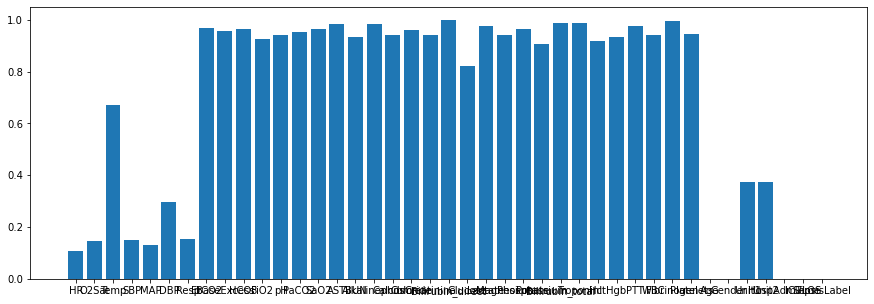

In [8]:
m = dict(missing)
plt.figure(figsize=(15,5))
plt.bar(m.keys(), m.values())


In [9]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                44 non-null     float64
 1   O2Sat             39 non-null     float64
 2   Temp              7 non-null      float64
 3   SBP               49 non-null     float64
 4   MAP               48 non-null     float64
 5   DBP               49 non-null     float64
 6   Resp              46 non-null     float64
 7   EtCO2             0 non-null      float64
 8   BaseExcess        0 non-null      float64
 9   HCO3              0 non-null      float64
 10  FiO2              2 non-null      float64
 11  pH                2 non-null      float64
 12  PaCO2             2 non-null      float64
 13  SaO2              2 non-null      float64
 14  AST               0 non-null      float64
 15  BUN               2 non-null      float64
 16  Alkalinephos      0 non-null      float64
 17 

In [22]:
features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP','Resp', 'Age', 'Gender', 'SepsisLabel']
physiological = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP','Resp']

i = 1
# if data[i][physiological].isna().iloc[0].all():

[None, 1, 2, None, 4, None, 5, 6, None]


True

In [73]:
x = [None, None, 1, 2, None, None, 4, None, 5, 6, None]

def wsum(v:list) -> float:
    """
    weighted sum of [(w1,x1), (w2,x2),...]
    where wi is the weight of x1
    """
    s = 0
    ws = 0
    if len(v) == 0:
        return 0

    for w,x in v:
        s += w*x
        ws += w
    return s / ws

def impute_window_avg(x, w_size=1, decay=2):
    n = len(x)
    _x = x.copy()
    for i in range(len(x)):
        v = []
        if np.isnan(x[i]):
            k = 0
            while len(v) == 0:
                for j in range(1,w_size+k):
                    if i-j>0 and not np.isnan(x[i-j]):
                        v.append(((1/j)**decay, x[i-j]))
                    if i+j < n and not np.isnan(x[i+j]):
                        v.append(((1/j)**decay, x[i+j]))
                if len(v) > 0:
                    _x[i] = wsum(v)
                k += 1
    return _x

In [77]:
data[0]['_HR'] = impute_window_avg(data[0]['HR'])
data[0][['HR', '_HR']]

,HR,_HR
0,NaN,58.50
1,58.5,58.50
2,54.0,54.00
3,58.0,58.00
4,58.0,58.00
5,60.0,60.00
6,56.0,56.00
7,60.5,60.50
8,64.0,64.00
9,63.0,63.00


<AxesSubplot:>

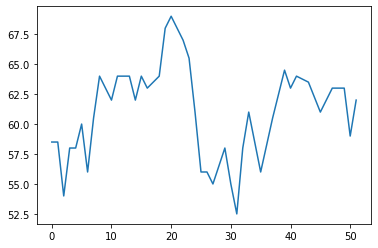

In [78]:
data[0]._HR.plot()

<AxesSubplot:>

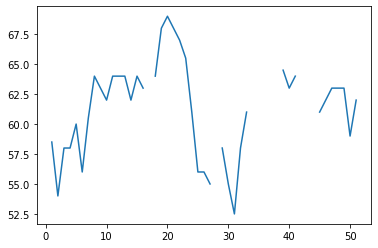

In [79]:
data[0].HR.plot()

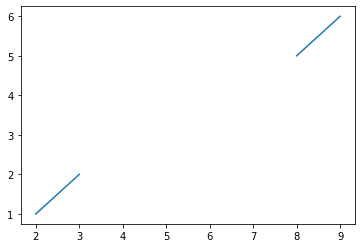

In [41]:
plt.plot(x)

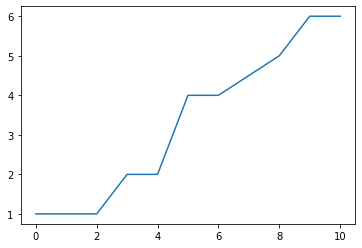

In [42]:
plt.plot(_x)

In [31]:
wsum([(1,10), (0.5, 3)]), (1*10 + 0.5*3) / 1.5

(7.666666666666667, 7.666666666666667)

<AxesSubplot:>

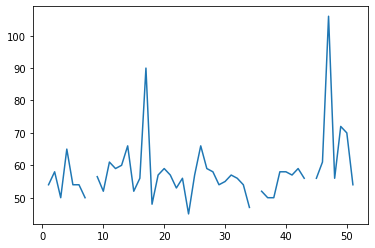

In [11]:
data[0].MAP.plot()